# Step 1 : Understand the Problem & Define Objectives

### Project Title:

Customer Segmentation using Unsupervised Learning

### Dataset Overview:

The dataset contains information about mall customers, including demographic and behavioral data.
Each row represents a customer, and key columns typically include:

CustomerID → Unique identifier

Gender → Male / Female

Age → Customer’s age

Annual Income (k$) → Annual income in thousand dollars

Spending Score (1-100) → Score assigned by the mall based on customer spending behavior

This dataset allows us to analyze purchasing patterns and group customers with similar behaviors.

### Objective of the Project:

The goal is to segment mall customers into distinct groups based on their income and spending score using unsupervised learning techniques.
This segmentation helps the mall management:

- Understand customer behavior better

- Personalize marketing strategies

- Identify high-value customers and potential churners

- Improve sales and customer experience

#### Columns Description

CustomerID: A unique identifier for each customer (integer).

Genre: The gender of the customer (Male/Female).

Age: The age of the customer (integer).

Annual Income (k$): Annual income of the customer in thousands of dollars (integer).

Spending Score (1-100): A score assigned by the mall based on customer behavior and spending patterns (integer).

# Step 2 : Collect & Understand the Data

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explorary Data Analysis

In [4]:
dimension = customers.shape
print("Number of rows :",dimension[0])
print("Number of features :",dimension[1])

Number of rows : 200
Number of features : 5


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df = customers.copy()
df=df.drop(columns=['CustomerID'], inplace=False)
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [8]:
categorical = df.select_dtypes(include=['object'])
cat_columns = categorical.columns.to_list()
categorical.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
numerical = df.select_dtypes(include=['number'])
num_columns = numerical.columns.to_list()
num_columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Univariate Analysis

#### Visualizing the distribution of the numerical features

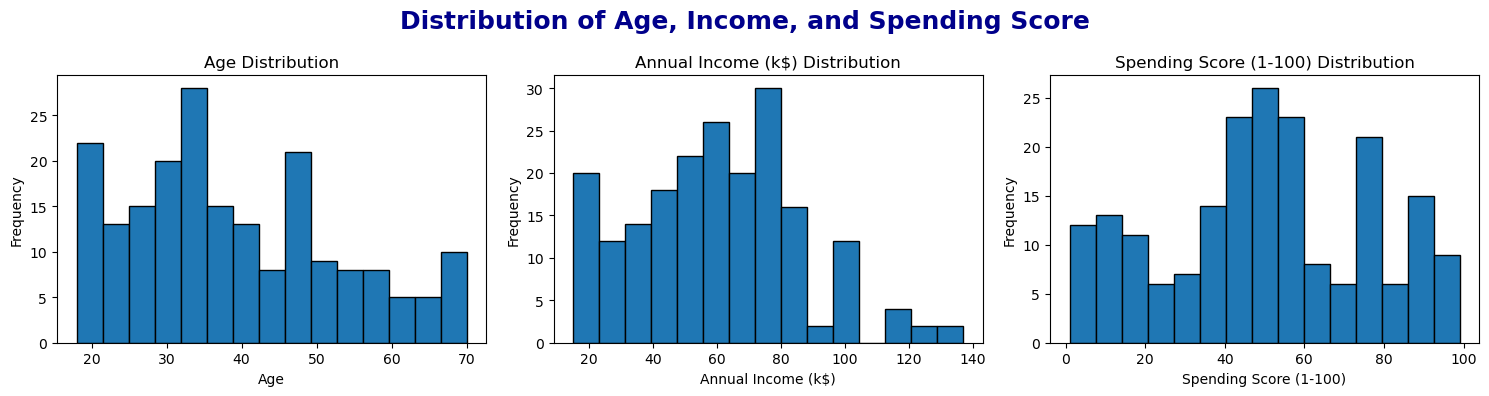

In [10]:

plt.figure(figsize=(15, 4))

for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i + 1)  # 1 row, 3 columns, position i+1
    plt.hist(df[col], bins=15, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle("Distribution of Age, Income, and Spending Score", fontsize=18, fontweight='bold', color='darkblue')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

### Bivariate Analysis

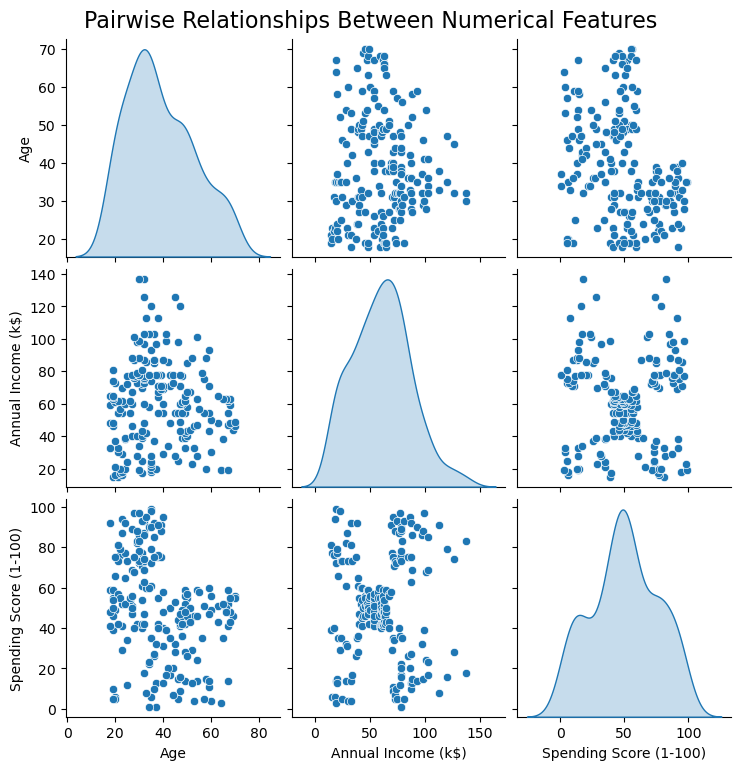

In [11]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02, fontsize=16)
plt.show()

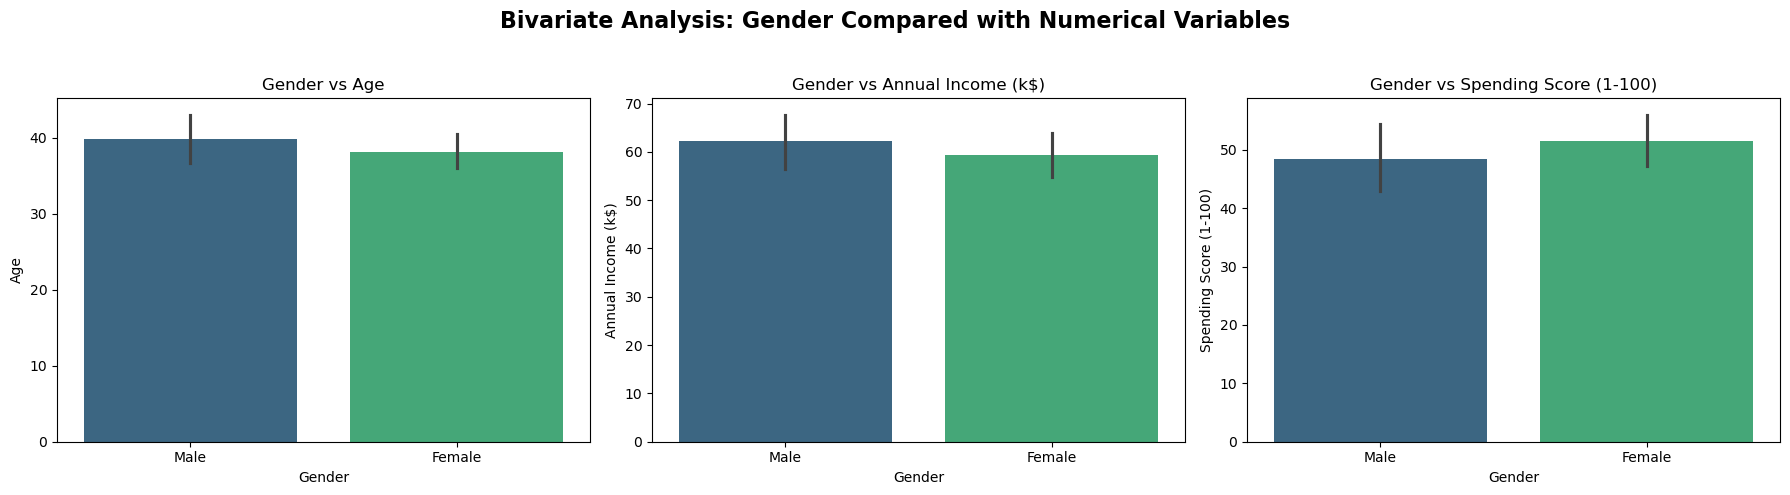

In [12]:

# Create figure size based on number of plots
fig, axes = plt.subplots(1, len(num_columns), figsize=(18, 5))

# Loop through numerical columns and create barplots
for i, num in enumerate(num_columns):
    sns.barplot(
        x=cat_columns[0],
        y=num,
        hue=cat_columns[0],       
        data=df,
        palette='viridis',       
        legend=False,             
        ax=axes[i]
    )
    axes[i].set_title(f'{cat_columns[0]} vs {num}', fontsize=12)
    axes[i].set_xlabel(cat_columns[0])
    axes[i].set_ylabel(num)

# Add a big title for the entire figure
plt.suptitle("Bivariate Analysis: Gender Compared with Numerical Variables", fontsize=16, fontweight='bold')

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

### Multivariate Analysis

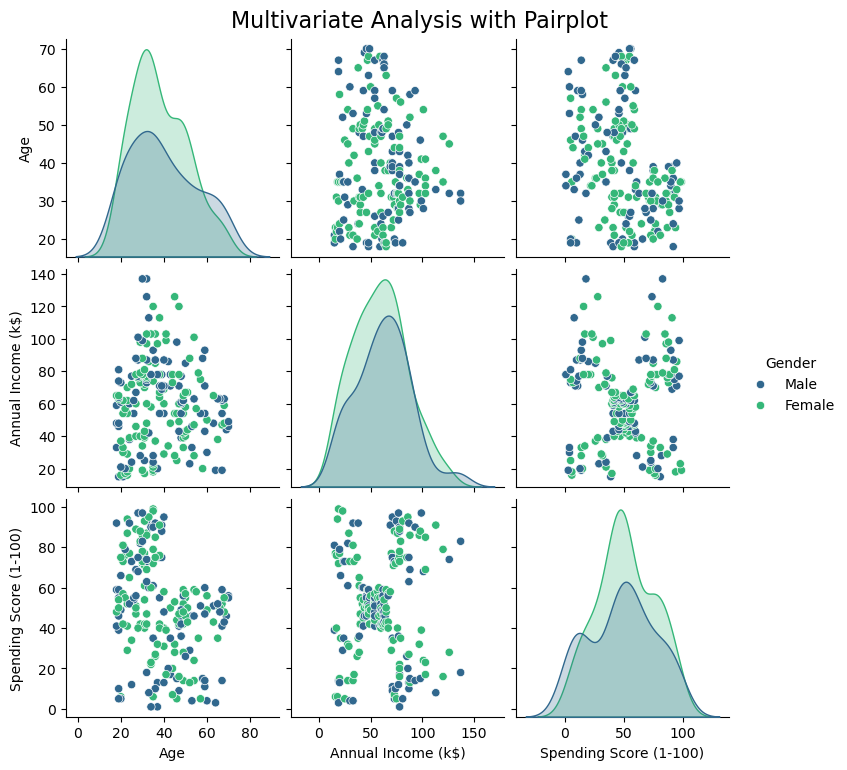

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='viridis')
plt.suptitle("Multivariate Analysis with Pairplot", y=1.02, fontsize=16)
plt.show()

### Detecting Missing Values 

In [14]:
if(df.isna().sum().all() == 0):
    print(df.isna().sum())
    print('No messing values in our dataset')
else :
    print('there is a missing values')

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
No messing values in our dataset


### Detecting Duplicates

In [15]:
if(df.duplicated().sum().all() == 0):
    print('No duplicates rows in our dataset')
else :
    print('there is a duplicates rows')

No duplicates rows in our dataset


### Detecting Outliers

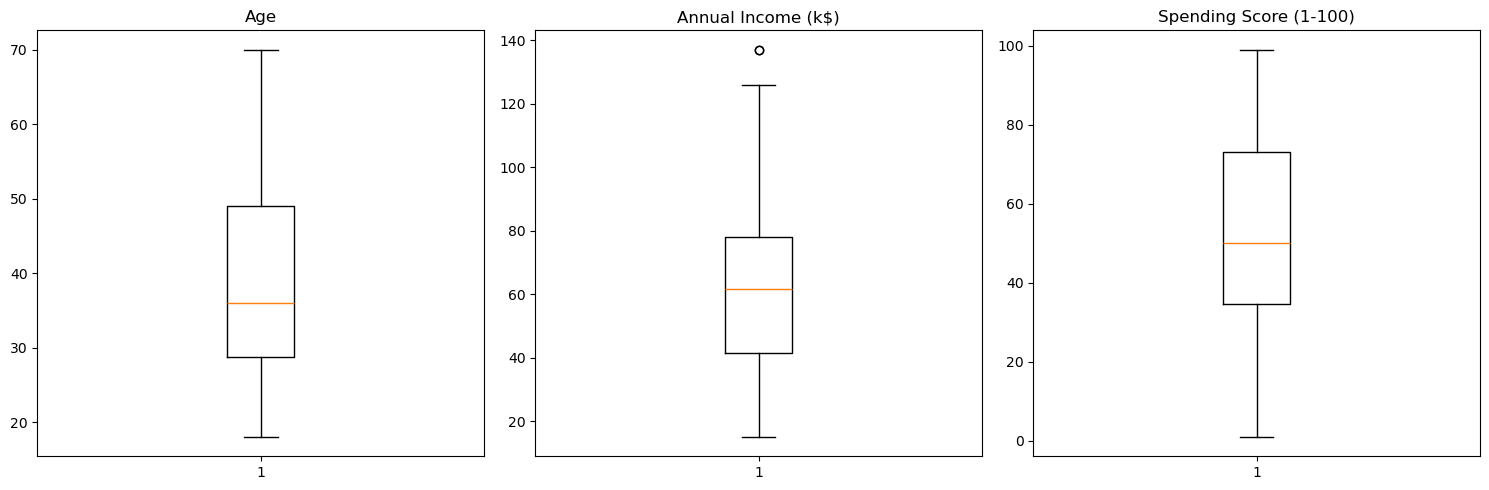

In [16]:
# Number of numerical columns
num_cols = len(num_columns)

# Create a figure with subplots in one row
plt.figure(figsize=(5*num_cols, 5))  # Adjust width based on number of columns

for i, col in enumerate(num_columns, 1):  # Start index from 1 for subplot
    plt.subplot(1, num_cols, i)           # 1 row, num_cols columns, position i
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

#### The column "Annual Income (k$)" has one outlier value.
#### We will use the IQR method to handle it.

In [17]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = handle_outliers(df, 'Annual Income (k$)')

#### Verification after handling outliers

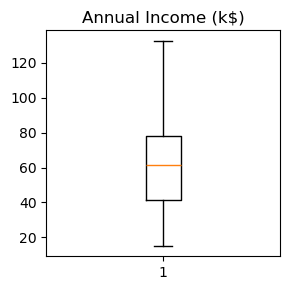

In [18]:
plt.figure(figsize=(3,3))  # Adjust width based on number of columns
plt.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.tight_layout()
plt.show()

#### Clustering (especially K-Means) works best with numerical continuous variables.
#### I will remove it

In [19]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head(1)

,Annual Income (k$),Spending Score (1-100)
0,15.0,39


#### Calculate correlation

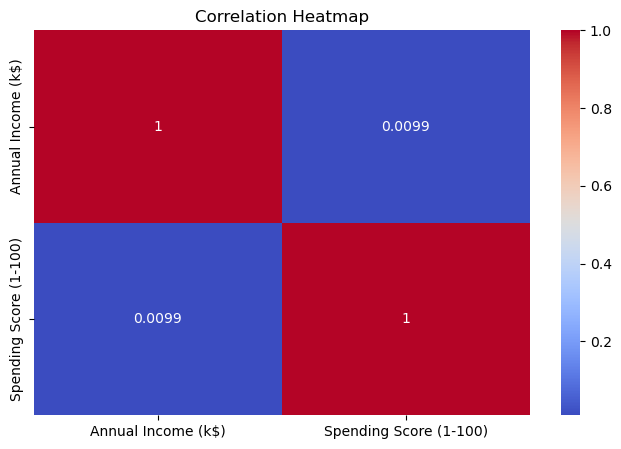

In [20]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 2 : Feature Engineering

### Data Scaling

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns.to_list())

### Determine Optimal Number of Clusters 

#### Elbow Method

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

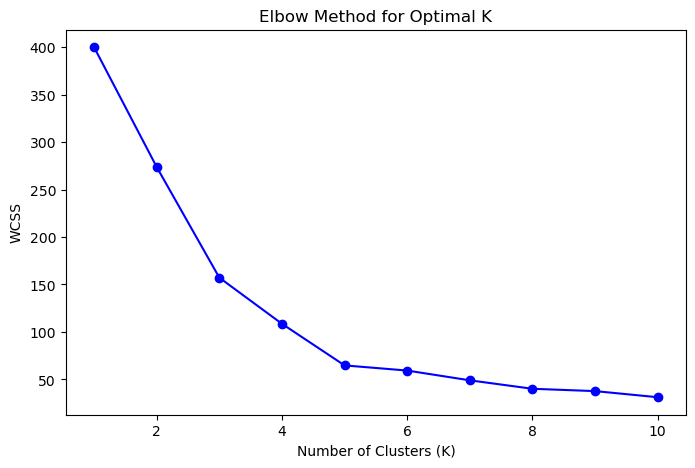

In [22]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

#### Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score
max_score = dict()
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    max_score[k] = score
    print(f"Clusters: {k}, Silhouette Score: {score:.3f}")
print(f"{max(max_score, key=max_score.get)} is the best number of cluster")

Clusters: 2, Silhouette Score: 0.396
Clusters: 3, Silhouette Score: 0.467
Clusters: 4, Silhouette Score: 0.495
Clusters: 5, Silhouette Score: 0.556
Clusters: 6, Silhouette Score: 0.515
Clusters: 7, Silhouette Score: 0.503
Clusters: 8, Silhouette Score: 0.466
Clusters: 9, Silhouette Score: 0.438
Clusters: 10, Silhouette Score: 0.433
5 is the best number of cluster


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

## Apply K-Means Clustering

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df = df.rename(columns={'Cluster':'Cluster_KMeans'})

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


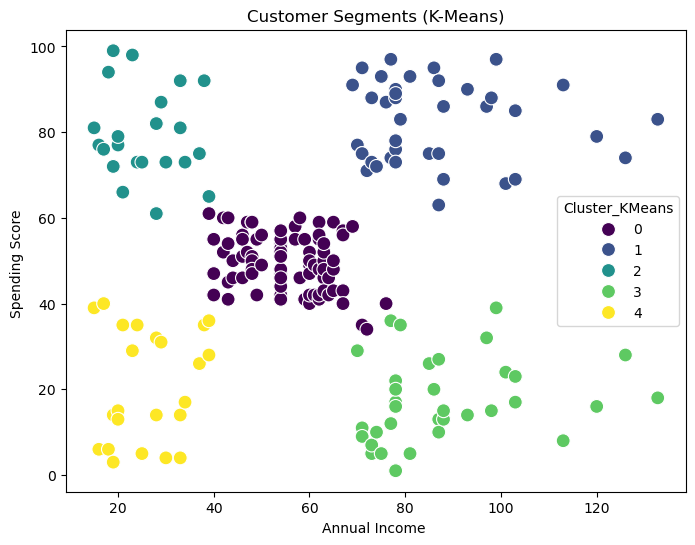

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster_KMeans'],
                palette="viridis",
                s=100)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.legend(title="Cluster_KMeans")
plt.show()

## apply DBSCAN algorithm

### 1-Choose min_samples

In [38]:
# rule of thumb => min_samples = 2 x number_features
min_samples = 2 * 2

### 2- Choose the best eps 

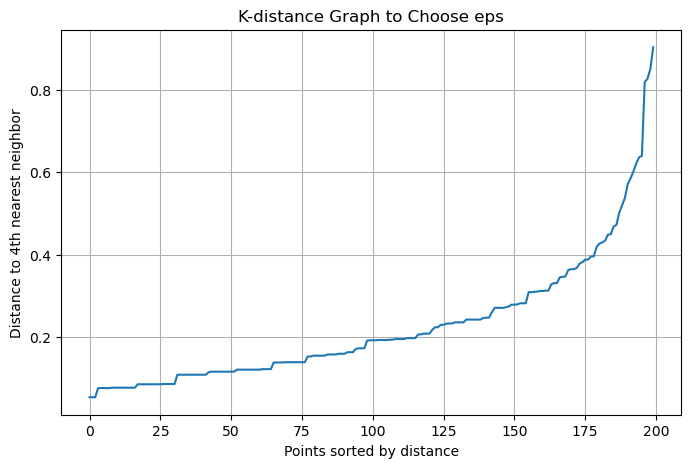

In [45]:
from sklearn.neighbors import NearestNeighbors

k = min_samples
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(df_scaled)  
distances, indices = nbrs.kneighbors(df_scaled)

# Sort distances
distances = np.sort(distances[:, k-1])

# Plot K-distance graph
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}th nearest neighbor")
plt.title("K-distance Graph to Choose eps")
plt.grid()
plt.show()


In [63]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=min_samples)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

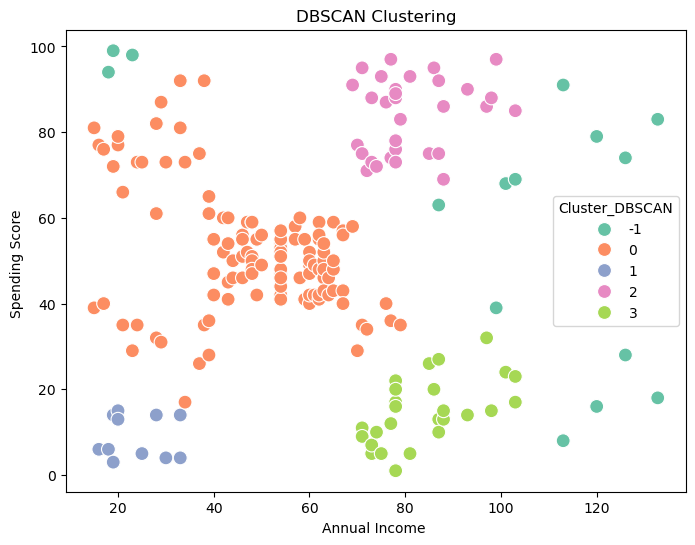

In [62]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_DBSCAN'], palette='Set2', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.show()

In [65]:
score = silhouette_score(df_scaled, df['Cluster_DBSCAN'])
print("Silhouette Score for DBSCAN:", score)

Silhouette Score for DBSCAN: 0.41289229233551183


# Visualizing and Analysing the results

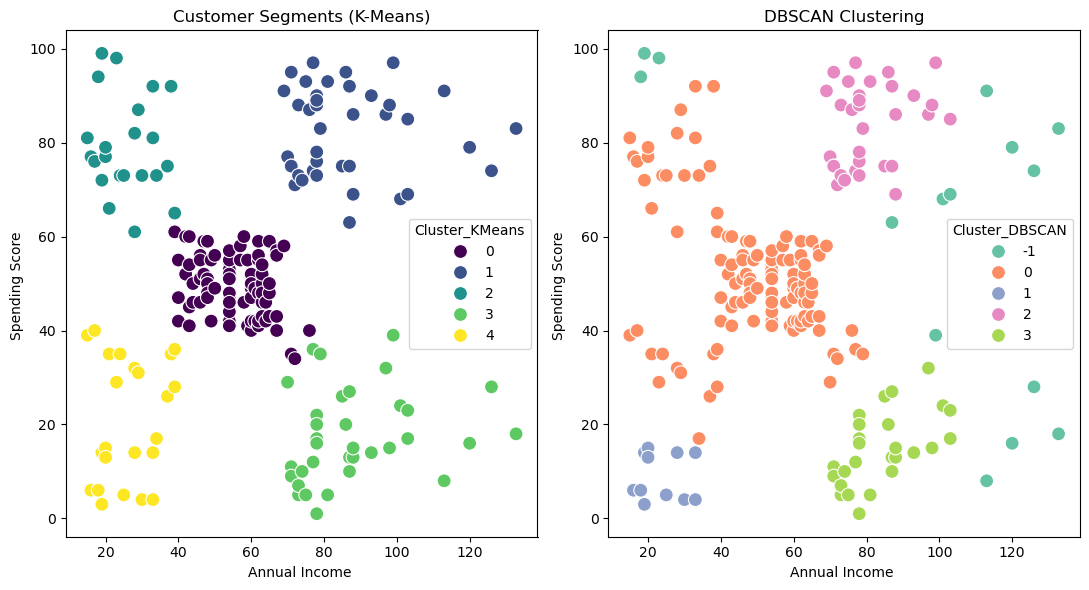

In [75]:
plt.figure(figsize=(11,6))  # Adjust width based on number of columns

plt.subplot(1, 2, 1)        
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Cluster_KMeans'],palette="viridis",s=100)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.legend(title="Cluster_KMeans")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_DBSCAN'], palette='Set2', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")

plt.tight_layout()
plt.show()

## Find the Number of Customer Groups

In [83]:
num_clusters = df['Cluster_KMeans'].nunique()
print(f"Number of customer groups (K-Means): {num_clusters}")

num_clusters_db = df['Cluster_DBSCAN'].nunique() - 1 #-1 represents noise points, so we exclude them
print(f"Number of customer groups (DBSCAN): {num_clusters_db}")

Number of customer groups (K-Means): 5
Number of customer groups (DBSCAN): 4


## Understand the Characteristics of Each Segment

In [100]:
if(('Age' not in df.columns) and ('CustomerID' not in df.columns)):
    df =pd.concat([df,customers[['Age','CustomerID']]],axis=1)

cluster_profile = df.groupby('Cluster_KMeans').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number_of_Customers'})

cluster_profile


,Age,Annual Income (k$),Spending Score (1-100),Number_of_Customers
Cluster_KMeans,,,,
0,42.716049,55.296296,49.518519,81
1,32.692308,86.429487,82.128205,39
2,25.272727,25.727273,79.363636,22
3,41.114286,88.078571,17.114286,35
4,45.217391,26.304348,20.913043,23


## Label the Segments

After analyzing cluster_profile, we can assign descriptive names to each group.
For example:

→ High Income, High Spending (Premium Customers)

→ Low Income, High Spending (Potentially Risky Customers)

→ High Income, Low Spending (Savings-Oriented Customers)

→ Low Income, Low Spending (Budget Customers)

In [108]:
def label_segment(row):
    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 60:
        return "Premium Customers"
    elif row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] > 60:
        return "Impulsive Buyers"
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] < 40:
        return "Careful Savers"
    else:
        return "Budget Customers"

df['Segment_Label'] = df.apply(label_segment, axis=1)


## Visualize the Customer Segments

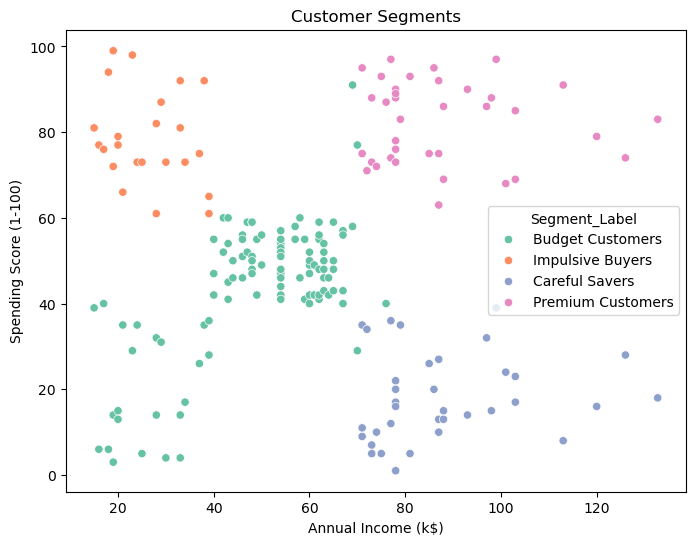

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment_Label',
    data=df,
    palette='Set2'
)
plt.title('Customer Segments')
plt.show()

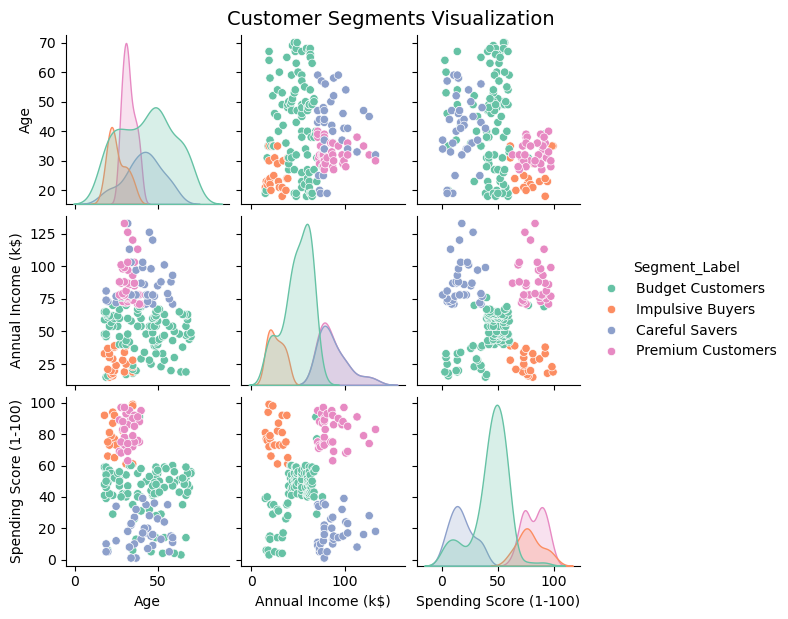

In [107]:
sns.pairplot(df,vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Segment_Label', palette='Set2',diag_kind='kde',height=2)
plt.suptitle("Customer Segments Visualization", y=1.02, fontsize=14)
plt.show()